In [166]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from matplotlib import pyplot as plt

In [167]:


from sklearn.datasets import fetch_openml 
mnist = fetch_openml('mnist_784' , version = 1 , as_frame=True)

In [168]:
X  = mnist['data']
y = mnist['target']
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [169]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


(784,)
(28, 28)


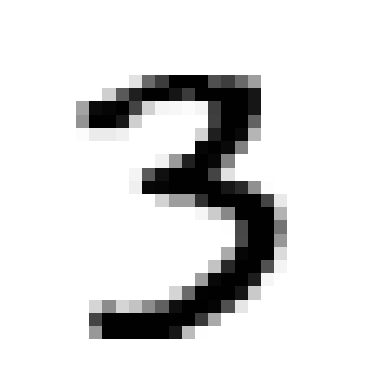

In [170]:
import matplotlib.cm as cm 

some_digit = X.iloc[10000 , :]
print(some_digit.shape)

some_digit_image = some_digit.values.reshape(28,28)
print(some_digit_image.shape)

plt.imshow(some_digit_image , cmap = cm.binary , interpolation="nearest")
plt.axis("off")
plt.show()


In [171]:
y[10000]

'3'

In [172]:
X_train , X_test , y_train , y_test = X.iloc[:60000] , X.iloc[60000 : ] , y.iloc[:60000] , y.iloc[60000:]
print(X_train.shape)

#shuffle index 
# shuffle_index = np.random.permutation(60000)
# shuffle_index.shape
# X_train , y_train = X_train.iloc[shuffle_index] , y_train.iloc[shuffle_index]

(60000, 784)


In [173]:
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
print(y_train.unique())
print(y_train.dtype)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']
category


In [175]:
# Training a Binary Classifier 
y_train_5 = (y_train == 5).astype(int)
y_test_5 = (y_test == 5).astype(int)

In [176]:
y_train_5.value_counts()

class
0    54579
1     5421
Name: count, dtype: int64

In [177]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42)

sgd_clf.fit(X_train , y_train_5)



SGDClassifier(random_state=42)

In [178]:
y_train

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: class, Length: 60000, dtype: int64

5


c:\Users\Sachin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([1])

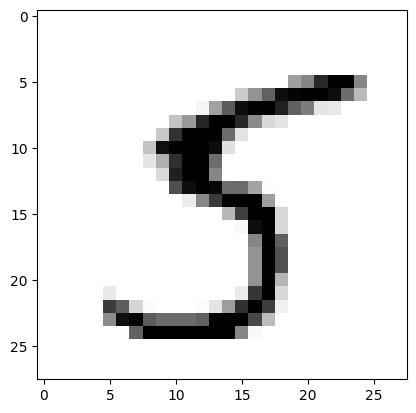

In [181]:
some_digit = X_train.iloc[59997, : ]
plt.imshow(some_digit.values.reshape(28,28) , cmap = cm.binary , interpolation="nearest")
print(y_train[59997])

y_prediction = sgd_clf.predict([some_digit])
y_prediction

7


c:\Users\Sachin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([0])

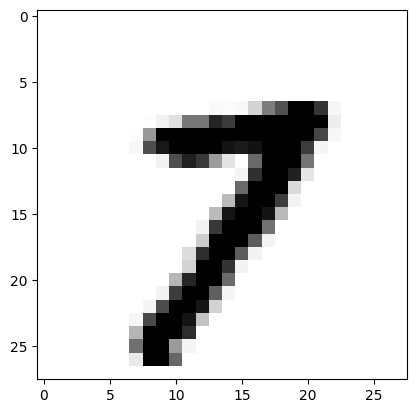

In [182]:
some_digit = X_train.iloc[40000, : ]
plt.imshow(some_digit.values.reshape(28,28) , cmap = cm.binary , interpolation="nearest")
print(y_train[40000])

y_prediction = sgd_clf.predict([some_digit])
y_prediction

In [189]:
# cross_val_score from scratch 

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

sgd_clf = SGDClassifier(random_state=42)
score = []

skfold = StratifiedKFold(n_splits=3)

for train_index, test_index in skfold.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)

    # Use .iloc for pandas indexing
    X_train_folds = X_train.iloc[train_index]
    y_train_folds = y_train_5.iloc[train_index]
    X_test_fold = X_train.iloc[test_index]
    y_test_fold = y_train_5.iloc[test_index]

    # Train the classifier
    clone_clf.fit(X_train_folds, y_train_folds)

    # Predict on test fold
    y_pred = clone_clf.predict(X_test_fold)

    # Calculate accuracy
    n_correct = sum(y_pred == y_test_fold)
    score.append(n_correct/len(y_test_fold))

print(score)


[0.95035, 0.96035, 0.9604]


In [190]:
#k fold cross validation score 
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf , X_train , y_train_5 , cv =3 , scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [ ]:
#dumb never 5 classifier not-5 classs

from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator): 
    def fit(self , X , y = None ): 
        pass 
    def predict(self , X) : 
        return np.zeros((len(X) , 1) )
    


never_5_clf = Never5Classifier()
cross_val_score(never_5_clf ,  X_train , y_train_5 , cv = 3 , scoring = 'accuracy')

# this still gives accuracy of around 90% on training set , although Never5Classifier always gives output 0  wheater it is 5 or not 
#WHY ?? becuase only around 9.035 % data in y_train_5 is 5 

array([0.91125, 0.90855, 0.90915])

In [204]:
y_train_5.value_counts()/len(y_train_5) * 100 

class
0    90.965
1     9.035
Name: count, dtype: float64

# This demonstrates why accuracy is generally not the preferred performance measure for classifiers, especially when you are dealing with skewed datasets (i.e., when some classes are much more frequent than others).


In [205]:
# Make predictions array , better to use cross_val_predict  rather than direct model 

from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf , X_train , y_train_5 , cv = 3)

In [210]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5 , y_train_pred)

array([[53892,   687],
       [ 1891,  3530]])

In [213]:
#perfect classifier 
y_train_prefect_predictions = y_train_5
confusion_matrix(y_train_5 , y_train_prefect_predictions)

array([[54579,     0],
       [    0,  5421]])